In [1]:
%pylab inline
import os
from astroML.decorators import pickle_results

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_pow_spec(omch2=0.112, omk=0.0):
    ! rm -f vary.ini
    ! rm -f input.ini
    ! rm -f test_scalCls.dat
    omega_m = 'echo "omch2 = {}" >> vary.ini'.format(omch2)
    omega_k = 'echo "omk = {}" >> vary.ini'.format(omk)
    os.system(omega_m)
    os.system(omega_k)
    ! cat vary.ini fixed_params.ini > input.ini
    ! /home/forero/github/pycamb/camb/./camb input.ini > output.dat
    data = loadtxt("test_scalCls.dat")
    return data[:,0], data[:,1]

def load_planck_data():
    data = loadtxt("../data/COM_PowerSpect_CMB_R1.10.txt")
    return data[:,0], data[:,3], data[:,4]

In [3]:
ll, powspec  = make_pow_spec(omch2=0.100, omk=0.1)
ll_obs, powspec_obs, sigma_powspec_obs = load_planck_data()

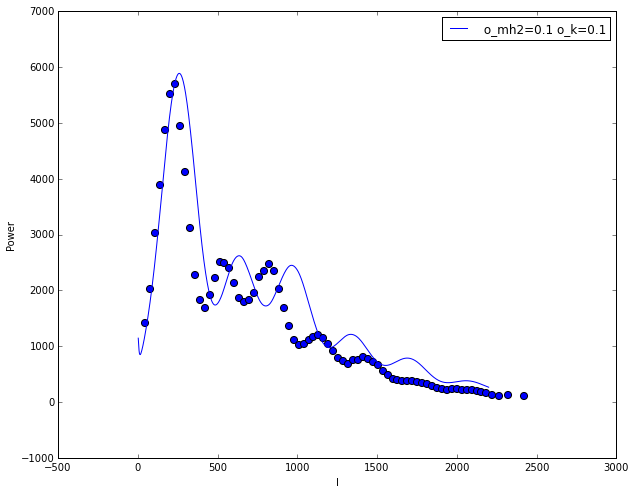

In [5]:
fig = plt.figure(figsize=(10, 8.0))
scatter(ll_obs, powspec_obs,s=50)
plot(ll, powspec, label=" o_mh2={} o_k={}".format(0.100,0.1))
xlabel("l")
ylabel("Power")
legend()

In [6]:
ll, powspec  = make_pow_spec()
ll_obs, powspec_obs, sigma_powspec_obs = load_planck_data()

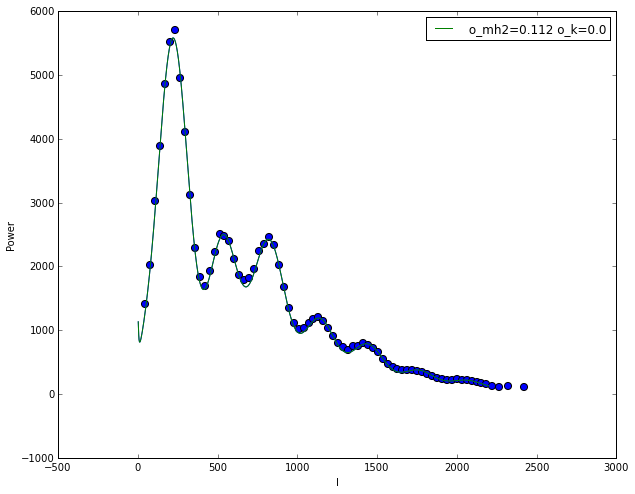

In [7]:
fig = plt.figure(figsize=(10, 8.0))
scatter(ll_obs, powspec_obs,s=50)
plot(ll, powspec)
plot(ll, powspec, label=" o_mh2={} o_k={}".format(0.112,0.0))
xlabel("l")
ylabel("Power")
legend()

In [8]:
def compute_logL(beta):
    ll, powspec = make_pow_spec(omch2=beta[0],omk=beta[1])
    ll_obs, powspec_obs, powspec_sigma_obs = load_planck_data() 
    mask1 = np.in1d(ll, ll_obs)
    mask2 = np.in1d(ll_obs, ll)
    return - sum( 0.5 *((powspec[mask1] - powspec_obs[mask2])/powspec_sigma_obs[mask2])**2)

In [9]:
#------------------------------------------------------------
# Define a function to compute (and save to file) the log-likelihood
@pickle_results('cmb_power.pkl')
def compute_cmb_power(Nbins=10):
    omegaM = np.linspace(0.05, 0.15, Nbins)
    omegaK = np.linspace(-0.1, 0.1, Nbins)

    logL = np.empty((Nbins, Nbins))

    for i in range(len(omegaM)):
        print '%i / %i' % (i + 1, len(omegaM))
        for j in range(len(omegaK)):
            logL[i, j] = compute_logL([omegaM[i], omegaK[j]])

    return omegaM, omegaK, logL

omegaM, omegaK, res = compute_cmb_power()
res -= np.max(res)

@pickle_results: using precomputed results from 'cmb_power.pkl'
